Binary with Spots
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Adding Spots
---------------------

Let's add one spot to each of our stars in the binary.

A spot is a feature, and needs to be attached directly to a component upon creation.  Providing a tag for 'feature' is entirely optional - if one is not provided it will be created automatically.

In [3]:
b.add_feature('spot', component='primary', feature='spot01')

<ParameterSet: 4 parameters | qualifiers: colat, radius, long, relteff>

As a shortcut, we can also call add_spot directly.

In [4]:
b.add_spot(component='secondary', feature='spot02')

<ParameterSet: 4 parameters | qualifiers: colat, radius, long, relteff>

Spot Parameters
-----------------

A spot is defined by the colatitude and longitude of its center, its angular radius, and the ratio of temperature of the spot to the local intrinsic value.

In [5]:
print b['spot01']

ParameterSet: 4 parameters
            colat@spot01@feature: 0.0 deg
             long@spot01@feature: 0.0 deg
           radius@spot01@feature: 1.0 deg
          relteff@spot01@feature: 1.0


In [6]:
b.set_value(qualifier='relteff', feature='spot01', value=0.9)

In [7]:
b.set_value(qualifier='radius', feature='spot01', value=30)

In [8]:
b.set_value(qualifier='colat', feature='spot01', value=45)

In [9]:
b.set_value(qualifier='long', feature='spot01', value=90)

To see the spot, add a mesh dataset and plot it.

In [10]:
b.add_dataset('mesh', times=[0,0.25,0.5,0.75,1.0], columns=['teffs'])

<ParameterSet: 4 parameters | contexts: compute, dataset>

In [11]:
b.run_compute()

<ParameterSet: 32 parameters | components: primary, secondary>

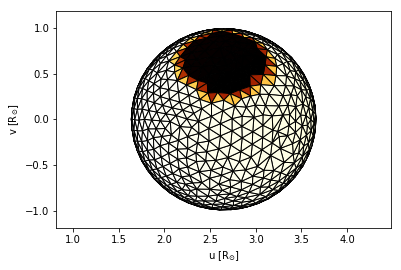

In [12]:
afig, mplfig = b.filter(component='primary', time=0.75).plot(fc='teffs', show=True)

Spot Corotation
--------------------

The positions (colat, long) of a spot are defined at t0 (note: t0@system, not necessarily t0_perpass or t0_supconj).  If the stars are not synchronous, then the spots will corotate with the star.  To illustrate this, let's set the syncpar > 1 and plot the mesh at three different phases from above.

In [13]:
b.set_value('syncpar@primary', 1.5)

In [14]:
b.run_compute(irrad_method='none')

Mon, 15 Oct 2018 17:20 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 32 parameters | components: primary, secondary>

At time=t0=0, we can see that the spot is where defined: 45 degrees south of the north pole and 90 degree longitude (where longitude of 0 is defined as pointing towards the companion star at t0).

In [15]:
print "t0 = {}".format(b.get_value('t0', context='system'))

t0 = 0.0


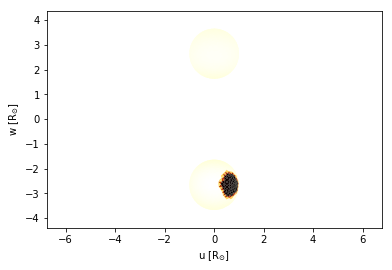

In [16]:
afig, mplfig = b.plot(time=0, y='ws', fc='teffs', ec='None', show=True)

At a later time, the spot is still technically at the same coordinates, but longitude of 0 no longer corresponds to pointing to the companion star.  The coordinate system has rotated along with the asyncronous rotation of the star.

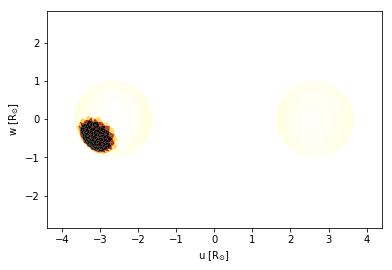

In [17]:
afig, mplfig = b.plot(time=0.25, y='ws', fc='teffs', facecmap='YlOrRd', ec='None', show=True)

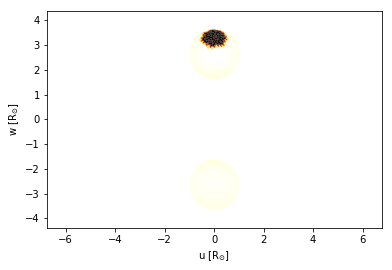

In [18]:
afig, mplfig = b.plot(time=0.5, y='ws', fc='teffs', facecmap='YlOrRd', ec='None', show=True)

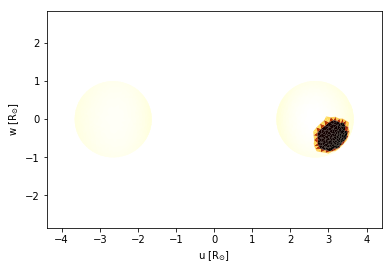

In [19]:
ax, artists = b.plot(time=0.75, y='ws', fc='teffs', facecmap='YlOrRd', ec='None', show=True)

Since the syncpar was set to 1.5, one full orbit later the star (and the spot) has made an extra half-rotation.

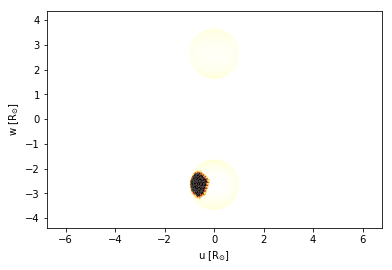

In [20]:
ax, artists = b.plot(time=1.0, y='ws', fc='teffs', facecmap='YlOrRd', ec='None', show=True)